In [2]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data =pd.read_csv('cancer_reg .csv', encoding=('ISO-8859-1'))# Reading the Data
data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [4]:
data.shape

(3047, 34)

In [5]:
data.describe()#Statistics analysis

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

It seems that there are  missing values in our data. Great, let's see the distribution of data

In [6]:
data['PctPrivateCoverageAlone'] = data['PctPrivateCoverageAlone'].fillna(data['PctPrivateCoverageAlone'].mean() ,inplace=True)#fill the missing values 

In [7]:
data.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverage  PctEmpPrivCoverage  \
count    3047.000000  ...         3047.000000         3047.000000   
mean       39.570725  ...           64.354939           41.196324   
std         5.226017  ...           10.647057            9.447687   
min        22.400000  ...           22.300000           13.500000   
25%        36.350000  ...           57.200000           34.500000   
50%        39.600000  ...           65.100000           41.100000   
75%        42.500000  ...           72.100000           47.700000   
max        64.700000  ...           92.300000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 31 columns]

In [8]:
data.isnull().sum()#check total number of null values in each features in the dataframe

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone    3047
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [9]:
data['PctEmployed16_Over'].replace(np.NaN , data['PctEmployed16_Over'].mean(),inplace=True)#filling a null values 

In [10]:
data.drop(['Geography','PctSomeCol18_24','PctPrivateCoverageAlone'], axis=1, inplace=True)

In [11]:
data.drop(['medIncome','studyPerCap','PctOtherRace'], axis=1, inplace=True)

In [12]:
data.drop(['PctUnemployed16_Over','PctMarriedHouseholds','binnedInc'], axis=1, inplace=True)

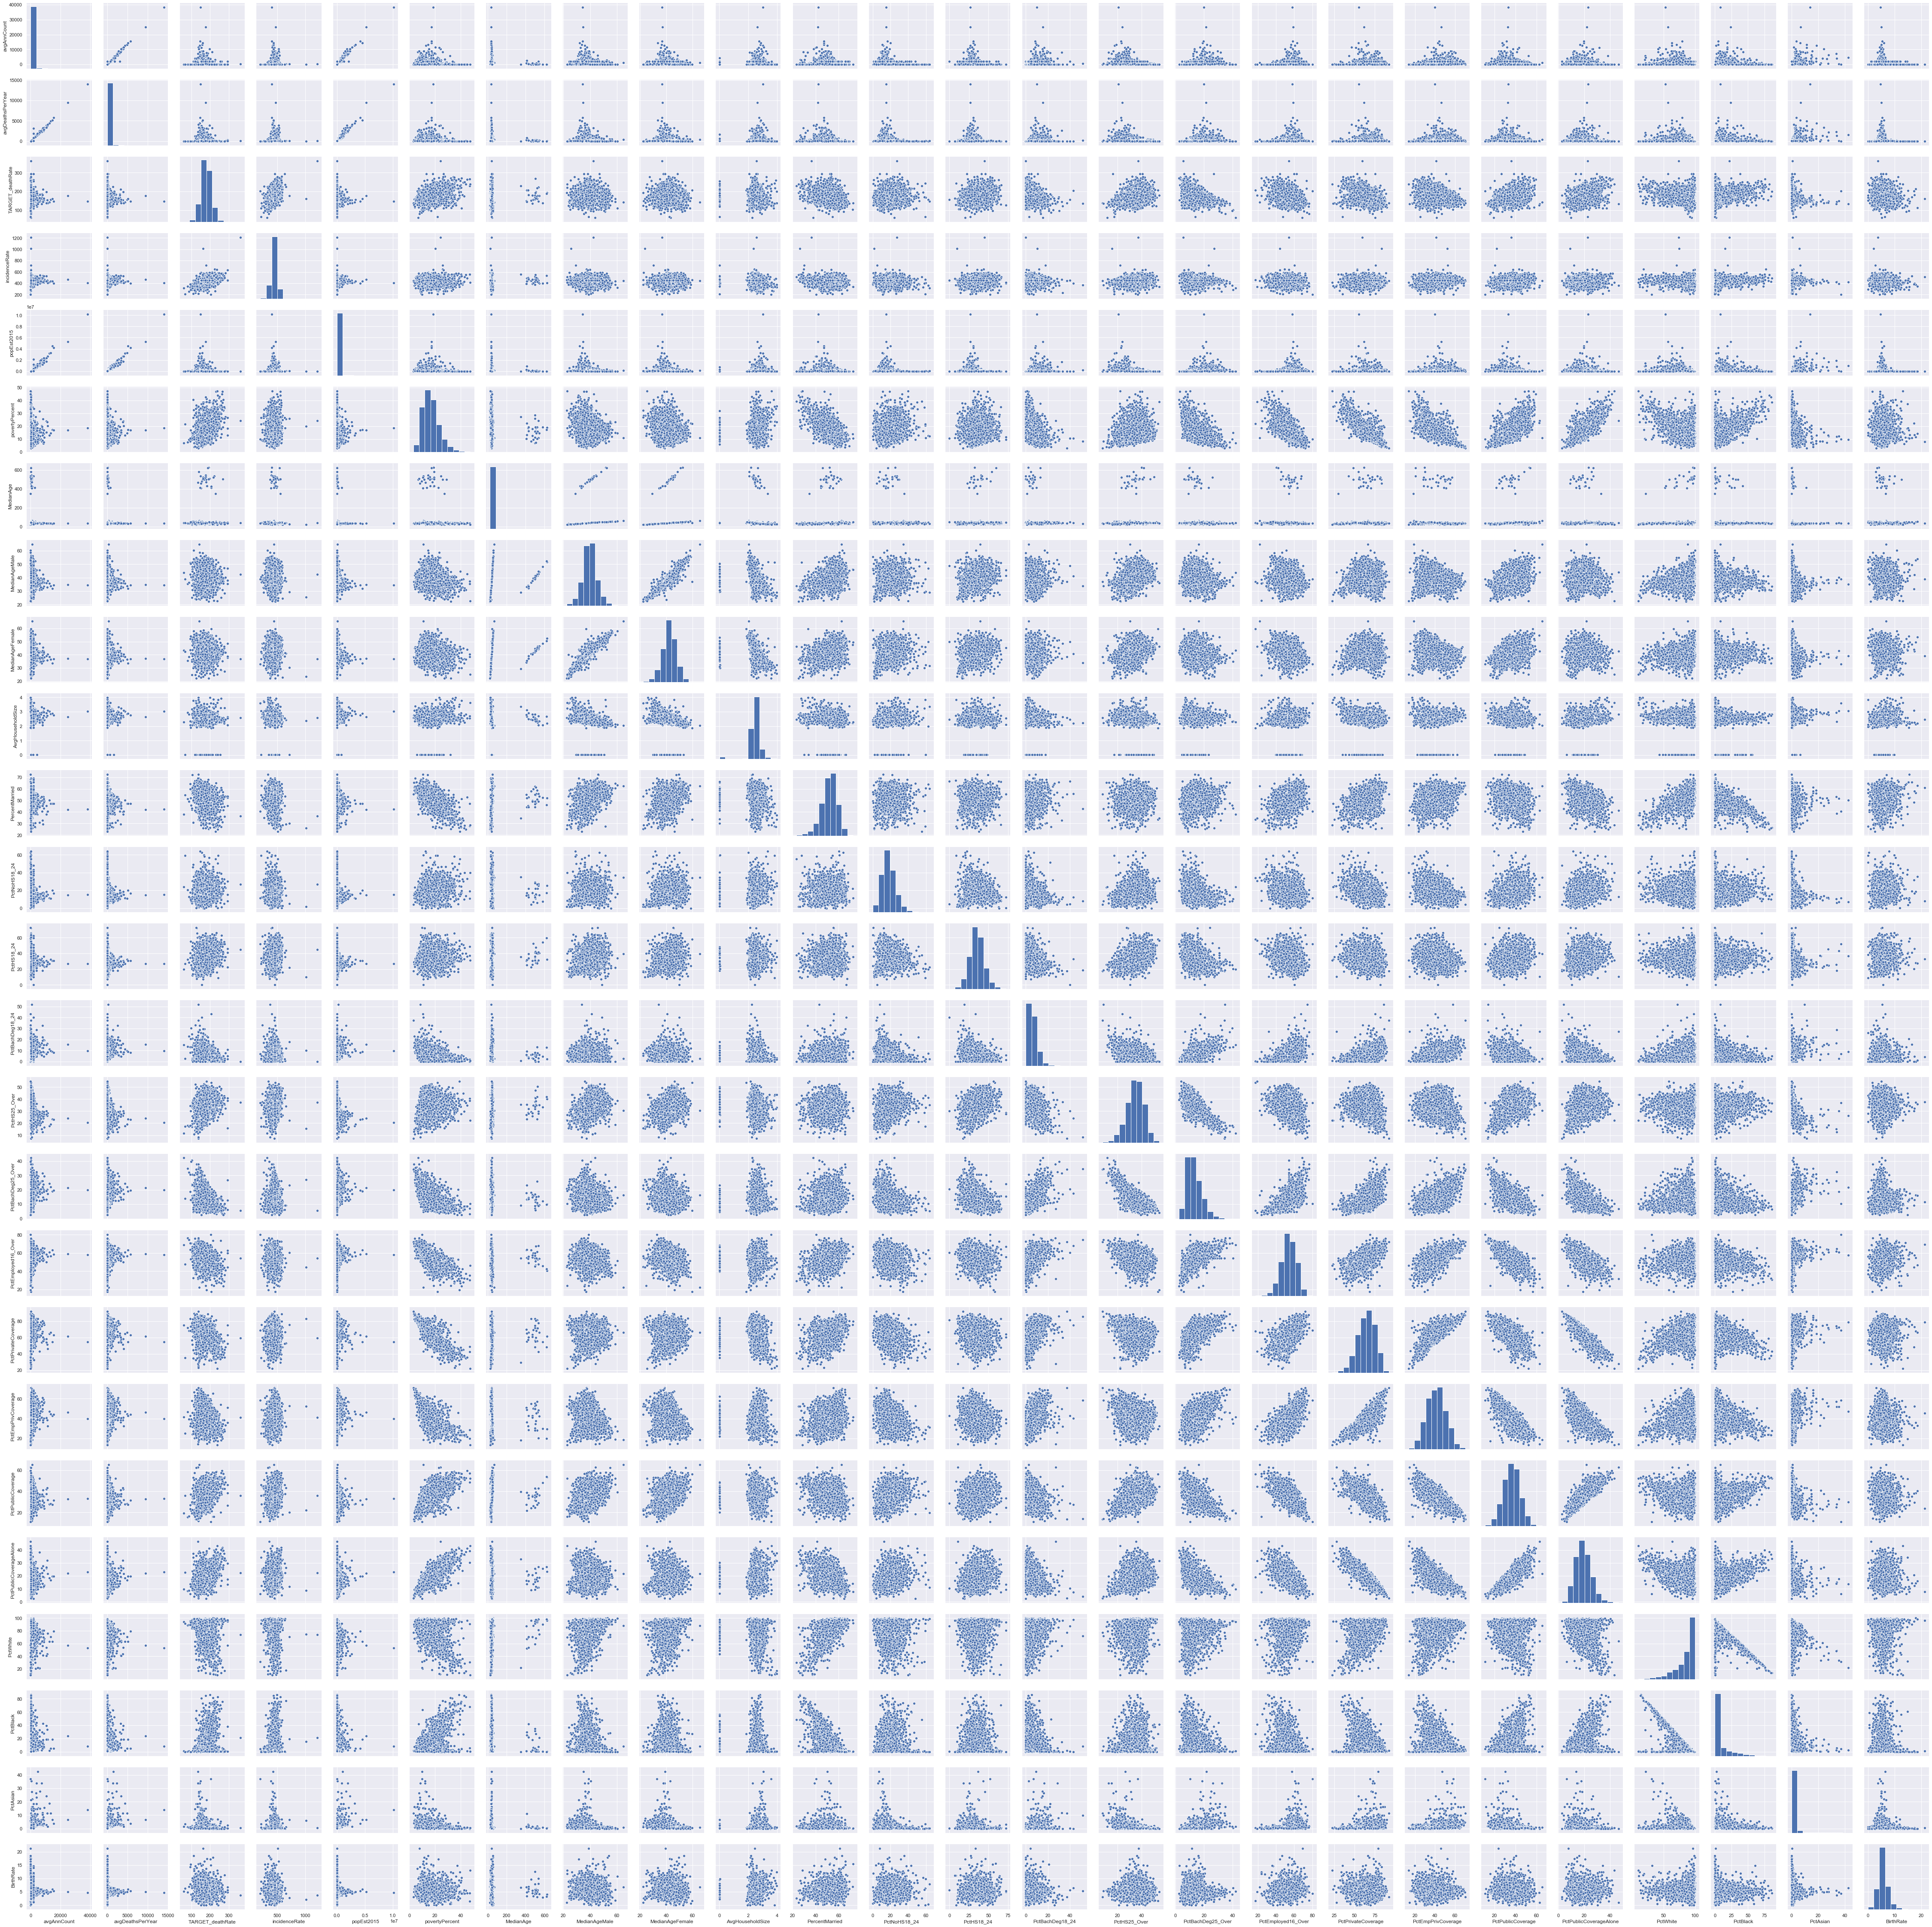

In [13]:
sns.pairplot(data)# data visualization

In [14]:
data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  popEst2015  \
0       1397.0               469             164.9          489.8      260131   
1        173.0                70             161.3          411.6       43269   
2        102.0                50             174.7          349.7       21026   
3        427.0               202             194.8          430.4       75882   
4         57.0                26             144.4          350.1       10321   

   povertyPercent  MedianAge  MedianAgeMale  MedianAgeFemale  \
0            11.2       39.3           36.9             41.7   
1            18.6       33.0           32.2             33.7   
2            14.6       45.0           44.0             45.8   
3            17.1       42.8           42.2             43.4   
4            12.5       48.3           47.8             48.9   

   AvgHouseholdSize  ...  PctBachDeg25_Over  PctEmployed16_Over  \
0              2.54  ...               19.6                51.9   
1              2.34  ...               22.7                55.9   
2              2.62  ...               16.0                45.9   
3              2.52  ...                9.3                48.3   
4              2.34  ...               15.0                48.2   

   PctPrivateCoverage  PctEmpPrivCoverage  PctPublicCoverage  \
0                75.1                41.6               32.9   
1                70.2                43.6               31.1   
2                63.7                34.9               42.1   
3                58.4                35.0               45.3   
4                61.6                35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  BirthRate  
0                    14.0  81.780529  2.594728  4.821857   6.118831  
1                    15.3  89.228509  0.969102  2.246233   4.333096  
2                    21.1  90.922190  0.739673  0.465898   3.729488  
3                    25.0  91.744686  0.782626  1.161359   4.603841  
4                    22.7  94.104024  0.270192  0.665830   6.796657  

[5 rows x 25 columns]

In [15]:
data.dtypes

avgAnnCount               float64
avgDeathsPerYear            int64
TARGET_deathRate          float64
incidenceRate             float64
popEst2015                  int64
povertyPercent            float64
MedianAge                 float64
MedianAgeMale             float64
MedianAgeFemale           float64
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctEmployed16_Over        float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
BirthRate                 float64
dtype: object

In [16]:
#feature selection
y = data['TARGET_deathRate']
X =data.drop(columns = ['TARGET_deathRate'])

In [17]:
#scaling numaric features using sklearn StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
#check the multicollinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

vif                Features
0    9.734396             avgAnnCount
1   31.046659        avgDeathsPerYear
2    1.223094           incidenceRate
3   26.106232              popEst2015
4    6.493737          povertyPercent
5    1.020842               MedianAge
6    9.427960           MedianAgeMale
7   10.500582         MedianAgeFemale
8    1.280028        AvgHouseholdSize
9    3.541701          PercentMarried
10   1.618812            PctNoHS18_24
11   1.596777              PctHS18_24
12   1.886984         PctBachDeg18_24
13   3.323869            PctHS25_Over
14   5.152946       PctBachDeg25_Over
15   3.657610      PctEmployed16_Over
16  15.604050      PctPrivateCoverage
17   7.094091      PctEmpPrivCoverage
18  23.593823       PctPublicCoverage
19  22.924592  PctPublicCoverageAlone
20   6.325903                PctWhite
21   4.872271                PctBlack
22   1.910855                PctAsian
23   1.181735               BirthRate

In [19]:
data.drop(['avgDeathsPerYear','popEst2015','PctPrivateCoverage','PctPublicCoverage','PctPublicCoverageAlone'], axis=1, inplace=True)

In [20]:
#feature selection
y = data['TARGET_deathRate']
X =data.drop(columns = ['TARGET_deathRate'])

In [21]:
#Split data into test and train
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=1000)

In [22]:
#create a Linear Regression model
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regression.score(x_train,y_train)

0.4989796490480566

In [24]:
regression.score(x_test,y_test)

0.5084662118363756

In [25]:
# saving the model to the local file system
import pickle 

In [26]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [27]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [28]:
lr=adj_r2(x_train,y_train)
lr

0.4936590789494518

In [29]:
adj_r2(x_test,y_test)

0.4924596841349822

In [30]:
lasscv = LassoCV(alphas = None,cv =5, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [31]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.001839736530546103

In [32]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001839736530546103, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
lasso_reg.score(x_test, y_test)

0.5086946129336598

In [34]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=5,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([6.81639626, 0.57531178, 1.35302217, 9.85276626, 8.69006198,
       8.18431831, 6.79748084, 5.30840158, 2.10388087, 0.84924777,
       8.26947014, 1.69417785, 9.19065588, 5.03820489, 8.19393379,
       4.1948954 , 4.79626965, 8.21473525, 3.85641416, 0.9260572 ,
       6.201554  , 9.6084496 , 4.81458685, 6.8726671 , 0.56542211,
       4.7509432 , 6.48823866, 0.27179484, 4.64156856, 7.506832  ,
       8.68234871, 7.22557485, 6.5543475 , 5.91869049, 6.5060505 ,
       1.69305224, 5.014215  , 8.23032119, 1.82569026, 6.73875674,
       5.56102199, 0.423004  , 7.99858501, 2.31256571, 6.43822982,
       6.94245591, 1.23929147, 5.86542659, 7.49710472, 0.74454881]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [35]:
ridgecv.alpha_

0.2717948402211978

In [36]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.2717948402211978, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
ridge_model.score(x_test, y_test)

0.5085662984612425

In [39]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [40]:
elasticCV.alpha_

0.026634999751192077

In [41]:
elasticCV.l1_ratio

0.5

In [42]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.026634999751192077, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [43]:
elasticnet_reg.score(x_test, y_test)

0.5128341314216407